In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/kaggle/input/hull-tactical-market-prediction/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             7206 non-null   float64
 11  E10                            7984 non-null   float64
 12  E11                            7984 non-null   f

In [4]:
df_train.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


# Feature Engneering

In [5]:
import math

col_na = []
for col, i in df_train.isna().sum().items():
    if (i!=0): col_na.append(col)

for col in col_na:
    if (math.isnan(df_train[col][0])):
        df_train[col][0] = 0
for col in col_na:
    while (df_train[col].isna().sum() > 0):
        df_train[col] = df_train[col].fillna(method='ffill')

In [6]:
col = df_train.columns.tolist()
col1 = df_train.columns.tolist()
col.remove('forward_returns',)
col.remove('risk_free_rate')
col.remove('market_forward_excess_returns')
col.remove('date_id')
col1.remove('forward_returns',)
col1.remove('risk_free_rate')
col1.remove('market_forward_excess_returns')
col1.remove('date_id')

In [7]:
for i in col:
    df_train[f'{i}_20leg_mean'] = df_train[i].rolling(window=20).mean()
    df_train[f'{i}_20leg_std'] = df_train[i].rolling(window=20).std()

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Columns: 286 entries, date_id to V9_20leg_std
dtypes: float64(276), int64(10)
memory usage: 19.6 MB


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65060
[LightGBM] [Info] Number of data points in the train set: 8990, number of used features: 282
[LightGBM] [Info] Start training from score 0.000051
훈련끝
피처 중요도


<Figure size 1000x800 with 0 Axes>

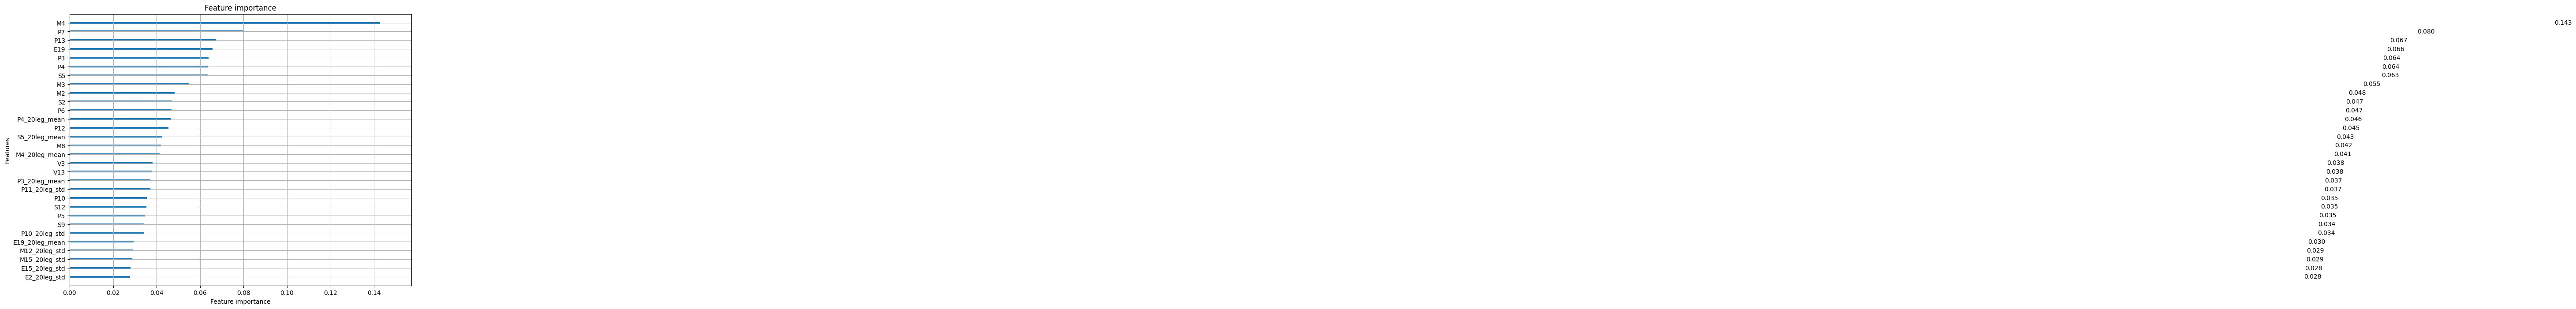

In [9]:
import lightgbm as lgb
import matplotlib.pyplot as plt

label = 'market_forward_excess_returns'
X = df_train.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y = df_train[label]

model = lgb.LGBMRegressor(n_estimators=200, n_jobs=1, seed=42)

model.fit(X, y)
print("훈련끝")
print("피처 중요도")
plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84440
[LightGBM] [Info] Number of data points in the train set: 8990, number of used features: 358
[LightGBM] [Info] Start training from score 0.000051
훈련끝
피처 중요도


<Figure size 1000x800 with 0 Axes>

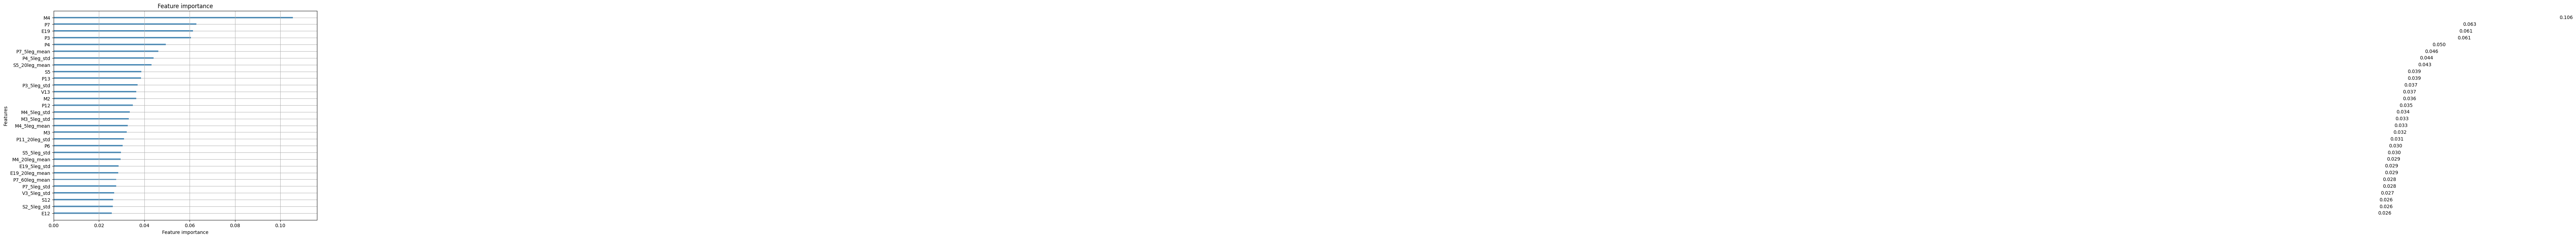

In [10]:
good_col = ['M4','P7','P13','E19','P3','P4','S5','M3','M2','S2','P6','P12','M8','V3','V13','P10','S12','P5','S9']

for i in good_col:
    df_train[f'{i}_5leg_mean'] = df_train[i].rolling(window=5).mean()
    df_train[f'{i}_60leg_mean'] = df_train[i].rolling(window=60).mean()
    df_train[f'{i}_5leg_std'] = df_train[i].rolling(window=5).std()
    df_train[f'{i}_60leg_std'] = df_train[i].rolling(window=60).std()

label = 'market_forward_excess_returns'
X = df_train.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y = df_train[label]

model = lgb.LGBMRegressor(n_estimators=200, n_jobs=1, seed=42)

model.fit(X, y)
print("훈련끝")
print("피처 중요도")
plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118156
[LightGBM] [Info] Number of data points in the train set: 8990, number of used features: 508
[LightGBM] [Info] Start training from score 0.000051
훈련끝
피처 중요도


<Figure size 1000x800 with 0 Axes>

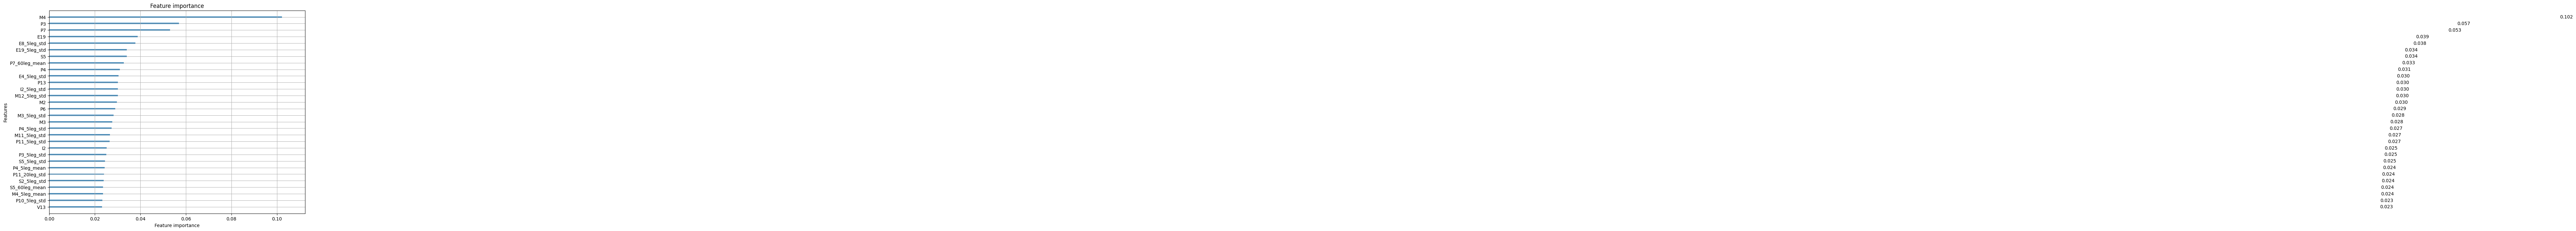

In [11]:
for i in col1:
    df_train[f'{i}_5leg_mean'] = df_train[i].rolling(window=5).mean()
    df_train[f'{i}_5leg_std'] = df_train[i].rolling(window=5).std()

model = lgb.LGBMRegressor(n_estimators=200, n_jobs=1, seed=42)
X = df_train.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y = df_train[label]

model.fit(X, y)
print("훈련끝")
print("피처 중요도")
plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118411
[LightGBM] [Info] Number of data points in the train set: 8990, number of used features: 509
[LightGBM] [Info] Start training from score 0.000051
훈련끝
피처 중요도


<Figure size 1000x800 with 0 Axes>

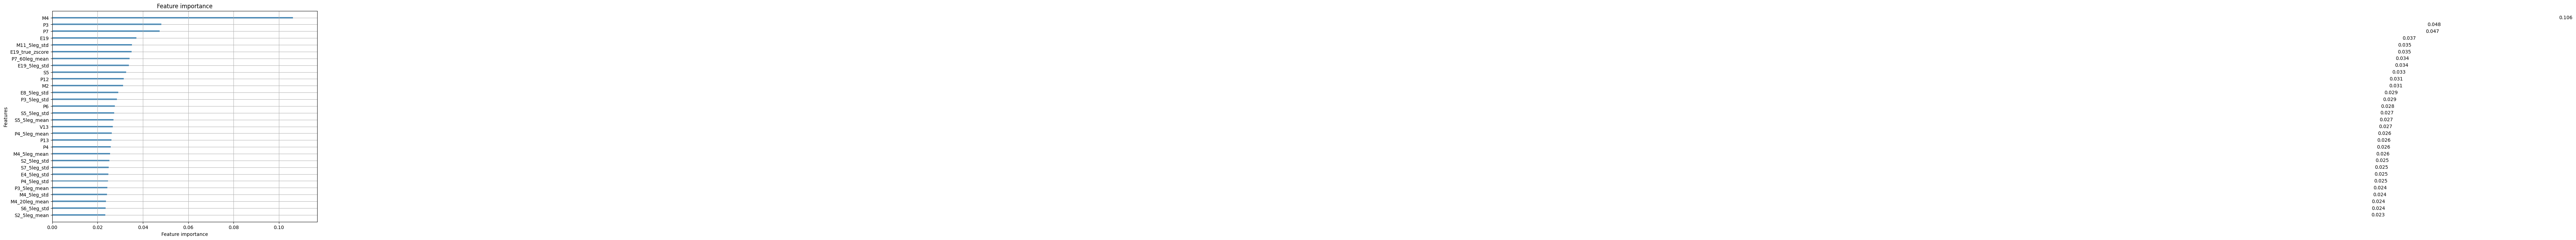

In [12]:
# 5일 이동평균
e19_mean_5d = df_train['E19'].rolling(window=5).mean()
# 5일 이동변동성
e19_std_5d = df_train['E19'].rolling(window=5).std()

# "진짜 Z-score"
df_train['E19_true_zscore'] = (df_train['E19'] - e19_mean_5d) / e19_std_5d

model = lgb.LGBMRegressor(n_estimators=200, n_jobs=1, seed=42)
X = df_train.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y = df_train[label]

model.fit(X, y)
print("훈련끝")
print("피처 중요도")
plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

In [13]:
print(f"원본 데이터 크기: {df_train.shape}")
df_train_clean = df_train.dropna()
print(f"NaN 제거 후 데이터 크기: {df_train_clean.shape}")

원본 데이터 크기: (8990, 513)
NaN 제거 후 데이터 크기: (7984, 513)


깨끗한 데이터로 훈련 시작...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 118374
[LightGBM] [Info] Number of data points in the train set: 7984, number of used features: 509
[LightGBM] [Info] Start training from score 0.000069
훈련 끝


<Figure size 1000x800 with 0 Axes>

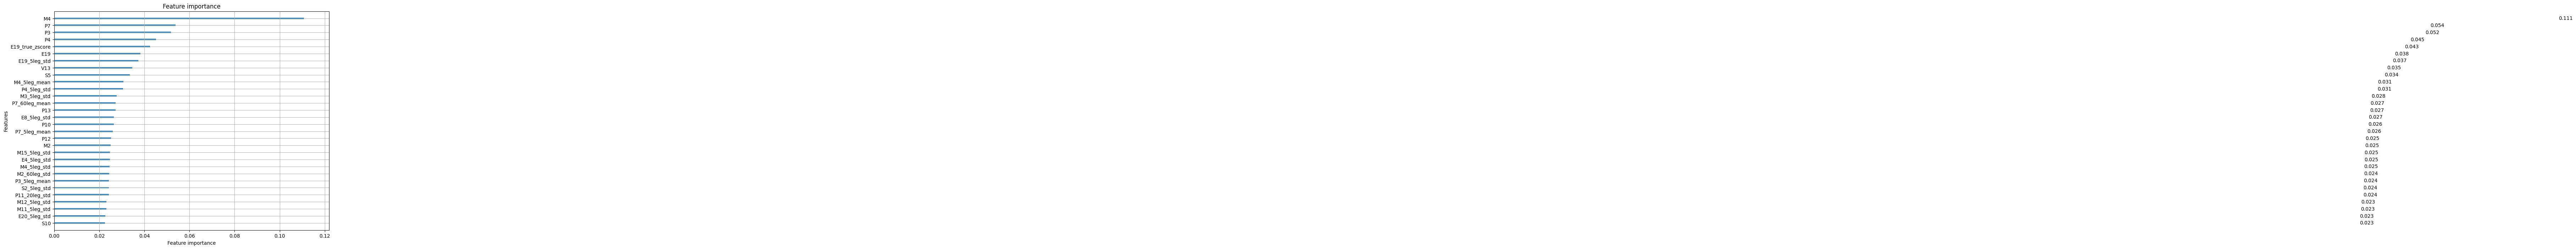

In [14]:
X_clean = df_train_clean.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y_clean = df_train_clean[label]

print("깨끗한 데이터로 훈련 시작...")
model.fit(X_clean, y_clean) # <--- X_clean, y_clean 사용
print("훈련 끝")

plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

깨끗한 데이터로 훈련 시작...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 119139
[LightGBM] [Info] Number of data points in the train set: 7984, number of used features: 512
[LightGBM] [Info] Start training from score 0.000069
훈련 끝


<Figure size 1000x800 with 0 Axes>

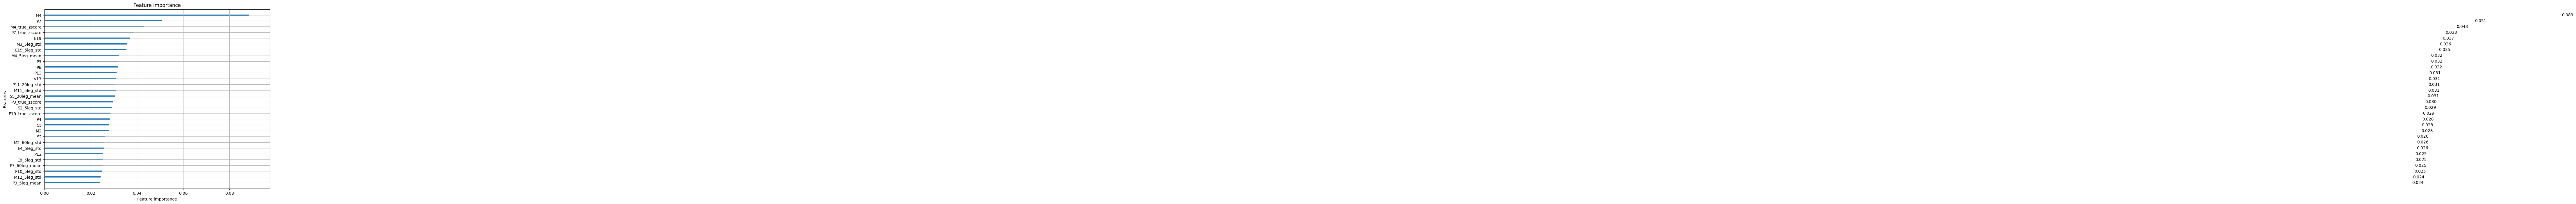

In [15]:
df_clean = df_train_clean

# M4 Z-score (5일 기준)
df_clean['M4_true_zscore'] = (df_clean['M4'] - df_clean['M4'].rolling(5).mean()) / df_clean['M4'].rolling(5).std()

# P7 Z-score (5일 기준)
df_clean['P7_true_zscore'] = (df_clean['P7'] - df_clean['P7'].rolling(5).mean()) / df_clean['P7'].rolling(5).std()

# P3 Z-score (5일 기준)
df_clean['P3_true_zscore'] = (df_clean['P3'] - df_clean['P3'].rolling(5).mean()) / df_clean['P3'].rolling(5).std()

X_clean = df_clean.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y_clean = df_clean[label]

print("깨끗한 데이터로 훈련 시작...")
model.fit(X_clean, y_clean) # <--- X_clean, y_clean 사용
print("훈련 끝")

plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

깨끗한 데이터로 훈련 시작...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 119904
[LightGBM] [Info] Number of data points in the train set: 7984, number of used features: 515
[LightGBM] [Info] Start training from score 0.000069
훈련 끝


<Figure size 1000x800 with 0 Axes>

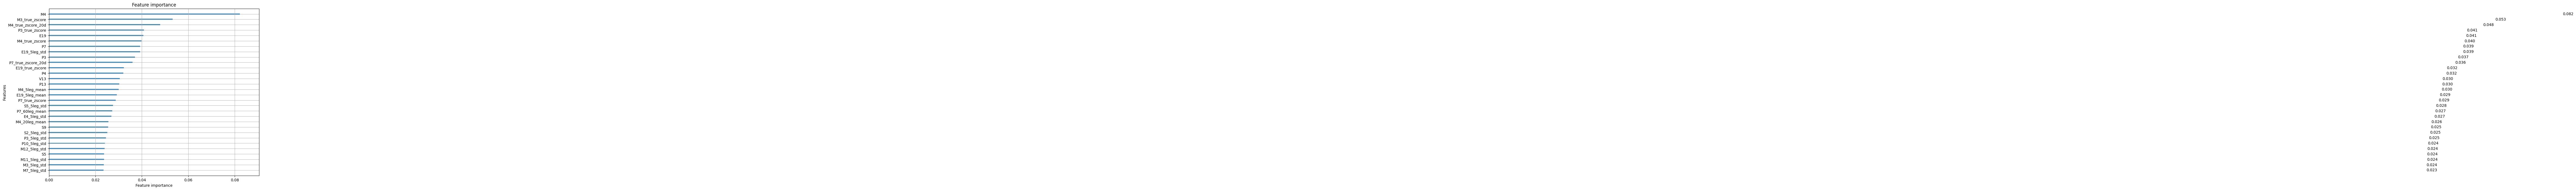

In [16]:
df_clean['M3_true_zscore'] = (df_clean['M3'] - df_clean['M3'].rolling(5).mean()) / df_clean['M3'].rolling(5).std()

df_clean['M4_true_zscore_20d'] = (df_clean['M4'] - df_clean['M4'].rolling(20).mean()) / df_clean['M4'].rolling(20).std()

df_clean['P7_true_zscore_20d'] = (df_clean['P7'] - df_clean['P7'].rolling(20).mean()) / df_clean['P7'].rolling(20).std()

X_clean = df_clean.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y_clean = df_clean[label]

print("깨끗한 데이터로 훈련 시작...")
model.fit(X_clean, y_clean) # <--- X_clean, y_clean 사용
print("훈련 끝")

plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

깨끗한 데이터로 훈련 시작...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120924
[LightGBM] [Info] Number of data points in the train set: 7984, number of used features: 519
[LightGBM] [Info] Start training from score 0.000069
훈련 끝


<Figure size 1000x800 with 0 Axes>

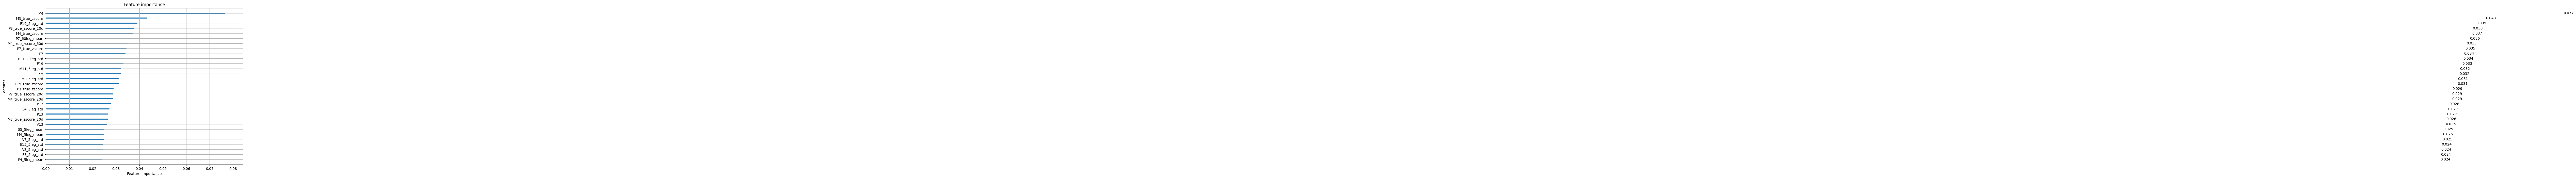

In [17]:
# M4 zscore에서 5일보다 20일이 더 중요해짐 -> 그럼 다른 피쳐도 그럴 가능성 있음/ 더 긴것도 해보자
df_clean['M3_true_zscore_20d'] = (df_clean['M3'] - df_clean['M3'].rolling(20).mean()) / df_clean['M3'].rolling(20).std()

df_clean['P3_true_zscore_20d'] = (df_clean['P3'] - df_clean['P3'].rolling(20).mean()) / df_clean['P3'].rolling(20).std()

df_clean['M4_true_zscore_60d'] = (df_clean['M4'] - df_clean['M4'].rolling(60).mean()) / df_clean['M4'].rolling(60).std()

df_clean['M3_true_zscore_60d'] = (df_clean['M3'] - df_clean['M3'].rolling(60).mean()) / df_clean['M3'].rolling(60).std()

X_clean = df_clean.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y_clean = df_clean[label]

print("깨끗한 데이터로 훈련 시작...")
model.fit(X_clean, y_clean) # <--- X_clean, y_clean 사용
print("훈련 끝")

plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

깨끗한 데이터로 훈련 시작...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120669
[LightGBM] [Info] Number of data points in the train set: 7984, number of used features: 518
[LightGBM] [Info] Start training from score 0.000069
훈련 끝


<Figure size 1000x800 with 0 Axes>

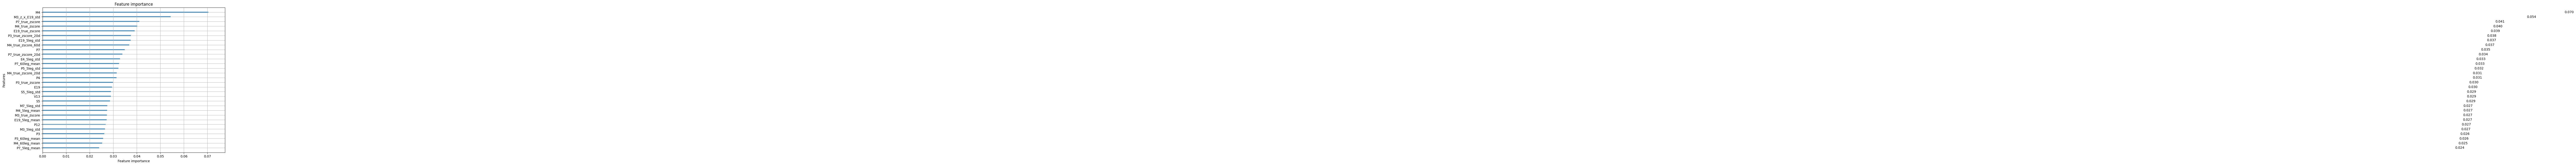

In [18]:
df_clean.drop(['M3_true_zscore_20d','M3_true_zscore_60d'], axis=1, inplace=True)

df_clean['M3_z_x_E19_std'] = df_clean['M3_true_zscore'] * df_clean['E19_5leg_std']

X_clean = df_clean.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y_clean = df_clean[label]

print("깨끗한 데이터로 훈련 시작...")
model.fit(X_clean, y_clean) # <--- X_clean, y_clean 사용
print("훈련 끝")

plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

깨끗한 데이터로 훈련 시작...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 121179
[LightGBM] [Info] Number of data points in the train set: 7984, number of used features: 520
[LightGBM] [Info] Start training from score 0.000069
훈련 끝


<Figure size 1000x800 with 0 Axes>

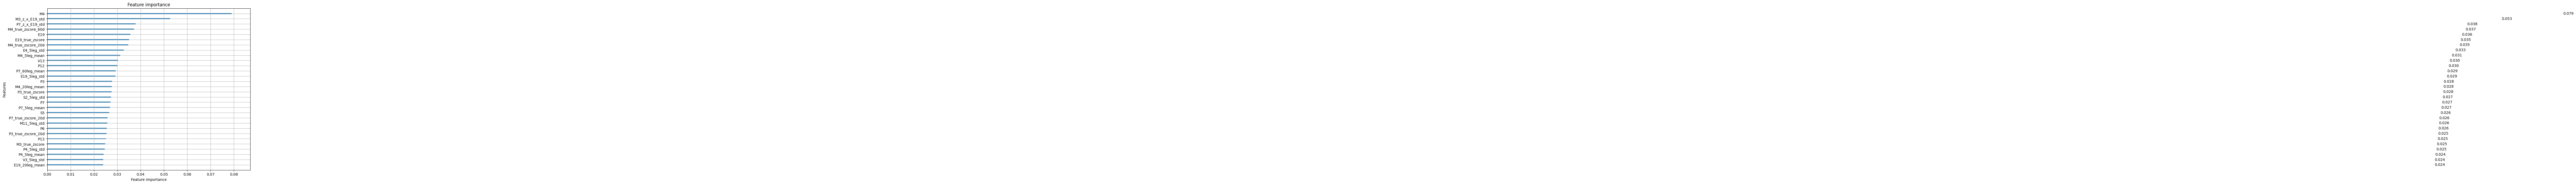

In [19]:
df_clean['P7_z_x_E19_std'] = df_clean['P7_true_zscore'] * df_clean['E19_5leg_std']

df_clean['M4_z_x_E19_std'] = df_clean['M4_true_zscore'] * df_clean['E19_5leg_std']

X_clean = df_clean.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y_clean = df_clean[label]

print("깨끗한 데이터로 훈련 시작...")
model.fit(X_clean, y_clean) # <--- X_clean, y_clean 사용
print("훈련 끝")

plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

깨끗한 데이터로 훈련 시작...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120159
[LightGBM] [Info] Number of data points in the train set: 7984, number of used features: 516
[LightGBM] [Info] Start training from score 0.000069
훈련 끝


<Figure size 1000x800 with 0 Axes>

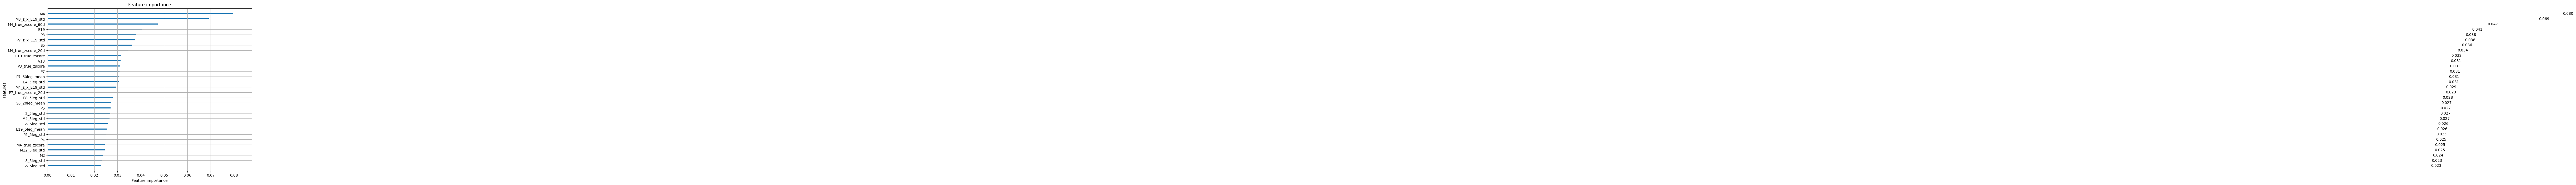

In [20]:
df_clean.drop(['M3_true_zscore','P7_true_zscore','P3_true_zscore_20d','P13'],axis=1,inplace=True)

X_clean = df_clean.drop([label,'forward_returns', 'risk_free_rate','date_id'], axis=1)
y_clean = df_clean[label]

print("깨끗한 데이터로 훈련 시작...")
model.fit(X_clean, y_clean) # <--- X_clean, y_clean 사용
print("훈련 끝")

plt.figure(figsize=(10,8))
lgb.plot_importance(
    model,
    max_num_features=30,
    importance_type='gain',
    figsize=(10,8)
)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

print("피쳐 중요도 명단 생성...")
importance_df = pd.DataFrame({
    'feature':model.feature_name_,
    'importance':model.feature_importances_
}).sort_values(by='importance',ascending=False)

sorted_features = importance_df['feature'].tolist()

n_features_to_test = [20,30,40,50,len(sorted_features)]
experiment_results = {}

tscv = TimeSeriesSplit(n_splits=5)

lgb_params = {
    'objective': 'regression_l1',
    'metric': 'mae',
    'n_estimators': 1000, # early_stopping을 쓰니까 넉넉하게
    'learning_rate': 0.01,
    'n_jobs': -1,
    'seed': 42,
    'verbose': -1,
}
print("=== 피처 개수별 성능 테스트 시작 ===")
# --- 4. "정예 멤버" 수 별로 루프 시작 ---
for n in n_features_to_test:
    
    print(f"\n--- [테스트 중] 상위 {n}개 피처 ---")
    
    # 1. 명단에서 상위 n개 피처 이름만 자르기
    top_n_features = sorted_features[:n]
    
    # 2. X_clean에서 딱 그 n개 컬럼만 선택하기
    X_sliced = X_clean[top_n_features]
    
    fold_maes = [] # 5개 폴드의 MAE 점수를 담을 리스트
    
    # 3. TimeSeriesSplit 교차검증 실행
    for fold, (train_index, val_index) in enumerate(tscv.split(X_sliced)):
        
        # 데이터 분할 (상위 n개 피처만 가진 데이터로)
        X_train, X_val = X_sliced.iloc[train_index], X_sliced.iloc[val_index]
        y_train, y_val = y_clean.iloc[train_index], y_clean.iloc[val_index]

        # 모델 훈련
        cv_model = lgb.LGBMRegressor(**lgb_params)
        cv_model.fit(X_train, y_train,
                     eval_set=[(X_val, y_val)],
                     eval_metric='mae',
                     callbacks=[lgb.early_stopping(100, verbose=False)])
        
        # 검증
        val_preds = cv_model.predict(X_val)
        fold_mae = mean_absolute_error(y_val, val_preds)
        fold_maes.append(fold_mae)

    # 5개 폴드의 평균 MAE 계산
    avg_mae = np.mean(fold_maes)
    print(f"[결과] 상위 {n}개 피처 평균 MAE: {avg_mae:.6f}")
    experiment_results[n] = avg_mae

# --- 5. 최종 결과 리포트 ---
print("\n=== 최종 결과 보고서 ===")
best_n = min(experiment_results, key=experiment_results.get)
best_mae = experiment_results[best_n]

for n, mae in experiment_results.items():
    print(f"피처 개수: {n}개 | 평균 MAE: {mae:.6f}")

print("\n-------------------------")
print(f"🎉 베스트 조합: 상위 {best_n}개 피처 (MAE: {best_mae:.6f})")
print("-------------------------")


피쳐 중요도 명단 생성...
=== 피처 개수별 성능 테스트 시작 ===

--- [테스트 중] 상위 20개 피처 ---
[결과] 상위 20개 피처 평균 MAE: 0.007858

--- [테스트 중] 상위 30개 피처 ---
[결과] 상위 30개 피처 평균 MAE: 0.007858

--- [테스트 중] 상위 40개 피처 ---
[결과] 상위 40개 피처 평균 MAE: 0.007852

--- [테스트 중] 상위 50개 피처 ---
[결과] 상위 50개 피처 평균 MAE: 0.007852

--- [테스트 중] 상위 516개 피처 ---
[결과] 상위 516개 피처 평균 MAE: 0.007854

=== 최종 결과 보고서 ===
피처 개수: 20개 | 평균 MAE: 0.007858
피처 개수: 30개 | 평균 MAE: 0.007858
피처 개수: 40개 | 평균 MAE: 0.007852
피처 개수: 50개 | 평균 MAE: 0.007852
피처 개수: 516개 | 평균 MAE: 0.007854

-------------------------
🎉 베스트 조합: 상위 50개 피처 (MAE: 0.007852)
-------------------------


In [22]:
# 중요한 피쳐 명단
N_BEST_FEATURE = 40

final_features_list = sorted_features[:N_BEST_FEATURE]

final_features_list

['M3_z_x_E19_std',
 'M4',
 'E19_true_zscore',
 'M4_true_zscore_60d',
 'P7_z_x_E19_std',
 'S5',
 'E19',
 'P4',
 'M4_true_zscore_20d',
 'P3',
 'M4_z_x_E19_std',
 'P3_true_zscore',
 'P7',
 'P7_true_zscore_20d',
 'M4_true_zscore',
 'P4_5leg_std',
 'E8_5leg_std',
 'M2',
 'I2_5leg_std',
 'I7_5leg_std',
 'M15_5leg_std',
 'V3',
 'S5_20leg_mean',
 'M4_5leg_std',
 'P4_5leg_mean',
 'P3_20leg_mean',
 'S6_5leg_std',
 'S5_5leg_mean',
 'S2_5leg_std',
 'M7_5leg_std',
 'V13',
 'V5_5leg_std',
 'M3',
 'M12_5leg_std',
 'E4_5leg_std',
 'M4_20leg_mean',
 'P3_5leg_mean',
 'P3_5leg_std',
 'P7_5leg_std',
 'P5_5leg_std']

In [23]:
X_final = df_clean[final_features_list]
y_final = df_clean[label]

final_model = lgb.LGBMRegressor(n_estimators=300, learning_rate=0.01)

final_model.fit(X_final, y_final)

print("최종 훈련 완료")

# 모델 저장
import joblib
joblib.dump(final_model, 'final_lgbm_model.pkl')

최종 훈련 완료


['final_lgbm_model.pkl']